# Worksheet 4: Numerical Solutions of ODEs

First, we create functions for implementing the ODE solvers.

In [27]:
#Required
import numpy as np

#Vectorized Euler ODE solver
def eulerODE(f, xt, x, y, h):
    '''
    f: Python function, takes a float and a numpy array, returns numpy array
        of same shape
    xt: float
    x: float
    y: numpy array (shape = (N))
    h: float
    Returns a tuple of two numpy arrays (xs,ys) where xs has shape ((xt-x)/h)
    and ys has shape ((xt-x)/h, N). These are points lying on solution curve
    of ODE dy/dx = f(x,y) for the IVP (x,y) - uses Euler's method with step h
    '''
    #Determining N
    ratio = (xt-x)/h
    Rratio = round(ratio)
    if ratio - Rratio < 0:
        N = Rratio
    else:
        N = Rratio + 1
    xs = np.linspace(x,xt,N)
    ys = np.zeros((N,len(y)), dtype=np.float64)
    ys[0, :] = y
    for i in range(1,N):
        t = xs[i]
        y = y + h*f(t,y)
        ys[i, :] = y
    return (xs,ys)

#Vectorized Midpoint method ODE solver
def midpointODE(f, xt, x, y, h):
    '''
    f: Python function, takes one float and a numpy array, returns
        numpy array of same shape
    xt: float
    x: float
    y: numpy array (shape = (N))
    h: float
    Returns a tuple of two numpy arrays (xs,ys) where xs has shape ((xt-x)/h)
    and ys has shape ((xt-x)/h, N). These are points lying on solution curve
    of ODE dy/dx = f(x,y) for the IVP (x,y) - Uses midpoint method with step h
    '''
    #Determining N
    ratio = (xt-x)/h
    Rratio = round(ratio)
    if ratio - Rratio < 0:
        N = Rratio
    else:
        N = Rratio + 1
    xs = np.linspace(x,xt,N)
    ys = np.zeros((N,len(y)),dtype=np.float64)
    ys[0, :] = y
    for i in range(1,N):
        t = xs[i]
        k1 = h*f(t,y)
        y = y + h*f(t + h/2, y + k1/2)
        ys[i, :] = y
    return (xs,ys)

## Q1
We are solving the differential equation,
$$
\frac{dx}{dt} = -xt
$$

$$
x(0) = 1
$$

The exact solution of the IVP is known to be,
$$
x(t) = e^{- \frac{t^2}{2}}
$$

### (a)

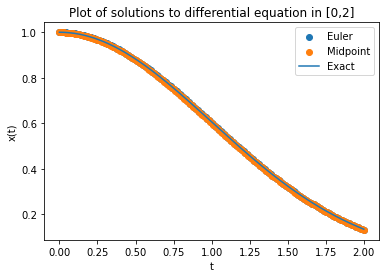

In [31]:
def f(x,y):
    '''
    x: float
    y = numpy array
    '''
    return -x*y

def exact(x):
    '''
    x: float
    Returns exact solution of the ODE in this case
    '''
    return np.exp(-(x**2)/2)

#Defining IVP
y0 = np.array([1.0])

#Setting t_final = 2, as suggested by sir in class. Demonstrates decay region
#of Gaussian better

#Euler solution
xsE, ysE = eulerODE(f, 2, 0, y0, h=0.01)

#Midpoint solution
xsM, ysM = midpointODE(f, 2, 0, y0, h=0.01)

#Exact solution
xsExact = np.linspace(0,2,1000)
ysExact = exact(xsExact)

#Plotting
plt.scatter(xsE,ysE,label='Euler')
plt.scatter(xsM,ysM,label='Midpoint')
plt.plot(xsExact,ysExact,label='Exact')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.title("Plot of solutions to differential equation in [0,2]")
plt.show()

### (b)

Euler's Method -> 
h        | Abs Deviation
 0.00010 |  0.0000315777
 0.00016 |  0.0000468969
 0.00025 |  0.0000744444
 0.00040 |  0.0000840878
 0.00063 |  0.0001321282
 0.00100 |  0.0001805524
 0.00158 |  0.0003045319
 0.00251 |  0.0007202979
 0.00398 |  0.0010542401
 0.00631 |  0.0011609172

Midpoint Method -> 
h        | Abs Deviation
 0.00010 |  0.0000270641
 0.00016 |  0.0000397411
 0.00025 |  0.0000630974
 0.00040 |  0.0000660876
 0.00063 |  0.0001035617
 0.00100 |  0.0001351774
 0.00158 |  0.0002323782
 0.00251 |  0.0006054350
 0.00398 |  0.0008707017
 0.00631 |  0.0008658026


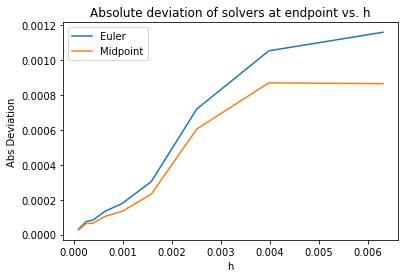

In [29]:
#Endpoint of solutions
tFinal = 2

#Holds the solutions, indexed by value of h
solnEuler = dict()
solnMidpoint = dict()

hs = [pow(10.0,i) for i in np.arange(-4,-2,0.2)]

for i in hs:
    solnEuler[i] = eulerODE(f, tFinal, 0, y0, h=i)
    solnMidpoint[i] = midpointODE(f, tFinal, 0, y0, h=i)

#Since we are required to know only the absolute error in the final point

#Holds on to value of absolute deviation from exact solution in final point, indexed by h value
devEuler = dict()
devMidpoint = dict()

for i in hs:
    devEuler[i] = abs(solnEuler[i][1][-1, :] - exact(solnEuler[i][0][-1]))
    devMidpoint[i] = abs(solnMidpoint[i][1][-1, :] - exact(solnMidpoint[i][0][-1]))

print("Euler's Method -> ")
print("h        | Abs Deviation")
for i in hs:
    print(f"{i: .5f} | {devEuler[i][0]: .10f}")
    
print()

print("Midpoint Method -> ")
print("h        | Abs Deviation")
for i in hs:
    print(f"{i: .5f} | {devMidpoint[i][0]: .10f}")
    
#Plotting to visualize
plt.plot(hs,[devEuler[i][0] for i in hs],label="Euler")
plt.plot(hs,[devMidpoint[i][0] for i in hs],label="Midpoint")
plt.xlabel("h")
plt.ylabel("Abs Deviation")
plt.title("Absolute deviation of solvers at endpoint vs. h")
plt.legend()
plt.show()

### (c)

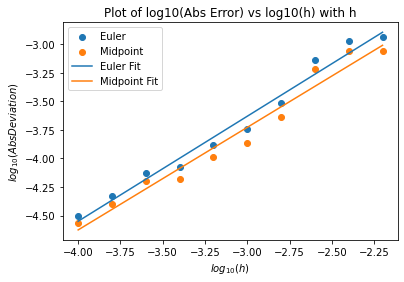

Euler Method fit: y = 0.9179412274866111*x + -0.8770247638601515
Midpoint Method fit: y = 0.8967831165127751*x + -1.037630390094514


In [30]:
from scipy.optimize import curve_fit

devE = np.array([devEuler[i][0] for i in hs])
devM = np.array([devMidpoint[i][0] for i in hs])

hs = np.array(hs)

#Getting array of log10 of deviation values
log10DevE = np.log10(devE)
log10DevM = np.log10(devM)
log10Hs = np.log10(hs)

#Fitting function
def linear(x, a, b):
    '''
    x: float
    a: float
    b: float
    '''
    return a*x + b

#Fitting
paramE, covE = curve_fit(linear, log10Hs, log10DevE)
paramM, covM = curve_fit(linear, log10Hs, log10DevM)

plt.scatter(log10Hs, log10DevE, label="Euler")
plt.scatter(log10Hs, log10DevM, label="Midpoint")
hFine = np.linspace(log10Hs[0],log10Hs[-1],100)
plt.plot(hFine, linear(hFine, paramE[0], paramE[1]), label="Euler Fit")
plt.plot(hFine, linear(hFine, paramM[0], paramM[1]), label="Midpoint Fit")
plt.legend()
plt.xlabel("$log_{10} (h)$")
plt.ylabel("$log_{10} (Abs Deviation)$")
plt.title("Plot of log10(Abs Error) vs log10(h) with h")
plt.show()

print(f"Euler Method fit: y = {paramE[0]}*x + {paramE[1]}")
print(f"Midpoint Method fit: y = {paramM[0]}*x + {paramM[1]}")

Clearly, the midpoint error is more efficient for a given value of h

## Q2
We solve the coupled differential equations,
$$
\frac{dy}{dt} = p
$$

$$
\frac{dp}{dt} = - 4 \pi^2 y
$$

$$
y(0) = 1
$$

$$
p(0) = 0
$$

These may be combined into the equation,
$$
\frac{d^2 y}{dt^2} = - 4 \pi^2 y
$$

Which is a simple SHO differential equation, with the known exact solution,

$$
y(t) = \cos(2 \pi t)
$$

### (a)

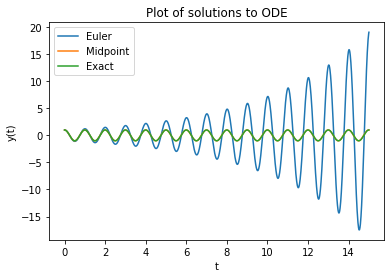

In [39]:
def f(x,y):
    '''
    x: float
    y: numpy array (shape - (2))
    '''
    return np.array([y[1], - 4*(np.pi**2)*y[0]])

def exact(x):
    '''
    x: numpy array
    '''
    return np.cos(2*np.pi*x)

tFinal = 15

#Initial values
y0 = np.array([0.0,1.0])

#Euler Solution
xsE, ysE = eulerODE(f, tFinal, 0, y0, h=0.01)

#Midpoint Solution
xsM, ysM = midpointODE(f, tFinal, 0, y0, h=0.01)

xs = np.linspace(0, tFinal, 1000)
ys = exact(xs)

#Plotting
plt.plot(xsE, ysE[:, 1], label="Euler")
plt.plot(xsM, ysM[:, 1], label="Midpoint")
plt.plot(xs, ys, label="Exact")
plt.legend()
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Plot of solutions to ODE")
plt.show()

### (b)

Euler's Method -> 
h        | Abs Deviation
 0.00010 |  1.0000020332
 0.00016 |  1.0001051365
 0.00025 |  1.0000338676
 0.00040 |  1.0001679912
 0.00063 |  1.0003973379
 0.00100 |  1.0016099195
 0.00158 |  1.0017052298
 0.00251 |  1.0058288789
 0.00398 |  1.0208789424
 0.00631 |  1.0645703890

Midpoint Method -> 
h        | Abs Deviation
 0.00010 |  0.9999990130
 0.00016 |  1.0000928795
 0.00025 |  1.0000127583
 0.00040 |  1.0001023858
 0.00063 |  1.0002117590
 0.00100 |  1.0009013095
 0.00158 |  1.0003229336
 0.00251 |  1.0009035344
 0.00398 |  1.0017395824
 0.00631 |  0.9982159047


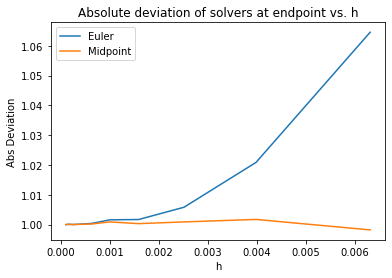

In [40]:
#Endpoint of solutions
tFinal = 15

#Holds the solutions, indexed by value of h
solnEuler = dict()
solnMidpoint = dict()

hs = [pow(10.0,i) for i in np.arange(-4,-2,0.2)]

for i in hs:
    solnEuler[i] = eulerODE(f, tFinal, 0, y0, h=i)
    solnMidpoint[i] = midpointODE(f, tFinal, 0, y0, h=i)

#Since we are required to know only the absolute error in the final point

#Holds on to value of absolute deviation from exact solution in final point, indexed by h value
devEuler = dict()
devMidpoint = dict()

for i in hs:
    devEuler[i] = abs(solnEuler[i][1][-1, :] - exact(solnEuler[i][0][-1]))
    devMidpoint[i] = abs(solnMidpoint[i][1][-1, :] - exact(solnMidpoint[i][0][-1]))

print("Euler's Method -> ")
print("h        | Abs Deviation")
for i in hs:
    print(f"{i: .5f} | {devEuler[i][0]: .10f}")
    
print()

print("Midpoint Method -> ")
print("h        | Abs Deviation")
for i in hs:
    print(f"{i: .5f} | {devMidpoint[i][0]: .10f}")
    
#Plotting to visualize
plt.plot(hs,[devEuler[i][0] for i in hs],label="Euler")
plt.plot(hs,[devMidpoint[i][0] for i in hs],label="Midpoint")
plt.xlabel("h")
plt.ylabel("Abs Deviation")
plt.title("Absolute deviation of solvers at endpoint vs. h")
plt.legend()
plt.show()

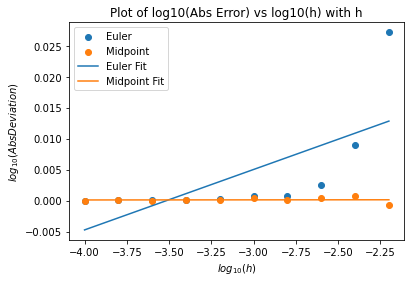

Euler Method fit: y = 0.009761685688070698*x + 0.034303027102497115
Midpoint Method fit: y = 1.6537004682541638e-05*x + 0.0001597539758637245


In [41]:
from scipy.optimize import curve_fit

devE = np.array([devEuler[i][0] for i in hs])
devM = np.array([devMidpoint[i][0] for i in hs])

hs = np.array(hs)

log10DevE = np.log10(devE)
log10DevM = np.log10(devM)
log10Hs = np.log10(hs)

#Fitting function
def linear(x, a, b):
    '''
    x: float
    a: float
    b: float
    '''
    return a*x + b

#Fitting
paramE, covE = curve_fit(linear, log10Hs, log10DevE)
paramM, covM = curve_fit(linear, log10Hs, log10DevM)

plt.scatter(log10Hs, log10DevE, label="Euler")
plt.scatter(log10Hs, log10DevM, label="Midpoint")
hFine = np.linspace(log10Hs[0],log10Hs[-1],100)
plt.plot(hFine, linear(hFine, paramE[0], paramE[1]), label="Euler Fit")
plt.plot(hFine, linear(hFine, paramM[0], paramM[1]), label="Midpoint Fit")
plt.legend()
plt.xlabel("$log_{10} (h)$")
plt.ylabel("$log_{10} (Abs Deviation)$")
plt.title("Plot of log10(Abs Error) vs log10(h) with h")
plt.show()

print(f"Euler Method fit: y = {paramE[0]}*x + {paramE[1]}")
print(f"Midpoint Method fit: y = {paramM[0]}*x + {paramM[1]}")

- Diptanuj Sarkar (22MS038)